In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd

In [2]:
!ls ./datasets/

2014_world_gdp_with_codes.csv  migrants.csv
diabetes.csv		       monthly-milk-production-pounds.csv
disease.csv		       significant-earthquakes.csv
earthquake.csv		       su5m.csv
gapminderDataFiveYear.csv      tesla-stock-price.csv
maternal_health.csv


In [3]:
dftesla = pd.read_csv('./datasets/tesla-stock-price.csv')
dftesla.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [4]:
x = dftesla['date'].values
y = dftesla['close'].values
z = dftesla['open'].values

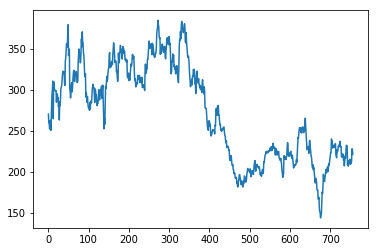

In [9]:
plt.plot(y)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text xticklabel objects>)

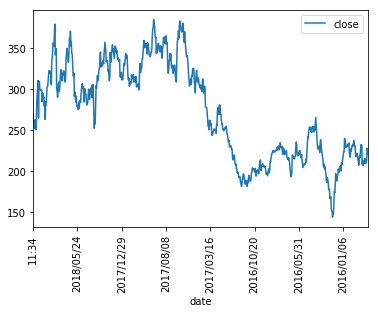

In [14]:
dftesla.plot('date','close')

plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation=90)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text xticklabel objects>)

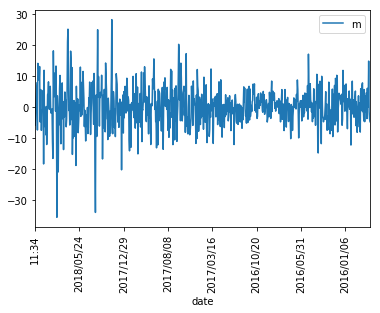

In [18]:
dftesla['m'] = (dftesla['open']-dftesla['close'])

dftesla.plot('date','m')

plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation=90)

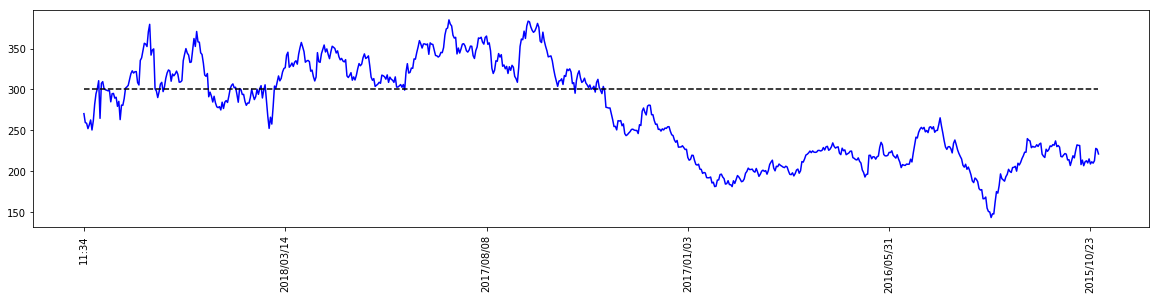

In [15]:
f, ax = plt.subplots(figsize=(20,4))
ax.plot(x,y,'b')
# ax.plot(x,z,'r')
ax.set_xticks(x[::150]);
plt.xticks(rotation=90)

ax.plot(np.arange(len(x)),np.zeros(len(x))+300,'k--')


In [19]:
df = pd.read_csv('./datasets/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text xticklabel objects>)

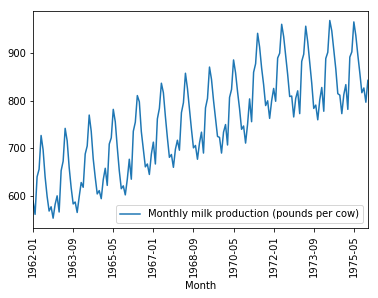

In [24]:
df.plot('Month','Monthly milk production (pounds per cow)'
        , kind='line')
ax.set_xticks(x[::150]);
plt.xticks(rotation=90)
# plt.xlim(0,30)

In [26]:
dfeq = pd.read_csv('./datasets/significant-earthquakes.csv')
print(dfeq.columns)
dfeq = dfeq.rename(columns={'Number of significant earthquakes (significant earthquakes)':'sig'})
print(dfeq.columns)

Index(['Entity', 'Code', 'Year',
       'Number of significant earthquakes (significant earthquakes)'],
      dtype='object')
Index(['Entity', 'Code', 'Year', 'sig'], dtype='object')


In [29]:
dfeq.head()

,Entity,Code,Year,sig
0,Afghanistan,AFG,-2150,0
1,Afghanistan,AFG,-2000,0
2,Afghanistan,AFG,-1610,0
3,Afghanistan,AFG,-1566,0
4,Afghanistan,AFG,-1450,0


In [32]:
dfeq[(dfeq['Entity']=='Iran') & (dfeq['sig']!=0)];

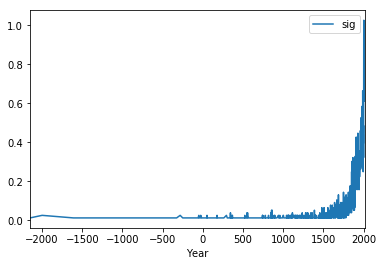

In [42]:
dfy = dfeq.groupby('Year')
dfy.mean().plot()


In [39]:
igb = dfeq[dfeq['Entity']=='Iran'].groupby('Year').mean()

In [43]:
igb.head()

,sig
Year,
-2150,0
-2000,0
-1610,0
-1566,0
-1450,0


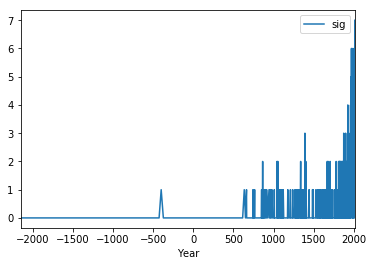

In [38]:
igb.plot()

In [44]:
df = pd.read_csv('./datasets/earthquake.csv')
df.head()

,Unknown Number of Deaths,0 Deaths,1-50 Deaths,51-100 Deaths,101-1000 Deaths,>1001 Deaths,"Unknown Number of Deaths, lat","Unknown Number of Deaths, lon","0 Deaths, lat","0 Deaths, lon","1-50 Deaths, lat","1-50 Deaths, lon","51-100 Deaths, lat","51-100 Deaths, lon","101-1000 Deaths, lat","101-1000 Deaths, lon",">1001 Deaths, lat",">1001 Deaths, lon"
0,"New Caledonia: Noumea; Vanuatu: Port-Vila, 1995","Solomon Islands: Santa Cruz Islands; Vanuatu,...","Philippines: Mindanao: Talakag-Malaybalay, 1987","Switzerland, 1801","Switzerland, 1584","Philippines: Mindanao: S, 1976",-23.008,169.9,-12.584,166.676,8.047,125.410,46.900,8.600,46.3,7,6.292,124.09
1,"Pakistan: Battagram, 2015","Iran: Western: Masjed-E- Soleyman, 2003","Pakistan: Quetta, Nushki, 1978","Venezuela: Cariaco-Cumana, 1997","Switzerland, 1584","China: Sichuan Province: Kangding, 1725",34.658,73.302,31.953,49.209,29.926,66.302,10.598,-63.486,46.2,7,30.1,101.9
2,"Peru, 1852",NaN,"Tonga Trench, 1977","Peru: Maca, Chivay, Yanque, 1991","El Salvador: San Marcos, 1965","Iran: Quchan, 1872",-12.1,-77.1,NaN,NaN,-22.878,-175.900,-15.679,-71.574,13.5,-89.3,37.3,58.3
3,"Chile: Southern, 1965",NaN,"Honduras-Guatemala-El Salvador, 1982","Japan: Off East Coast Of Honshu Island, 1968","China: Sichuan Province, 1933","Iran: Quchan, 1871",-42.9,-75.13,NaN,NaN,14.487,-89.121,40.800,143.200,29.5,102.5,37.3,58.3
4,"Indonesia: Banda Sea, 1925",NaN,"China: Gansu Province: Tianzhu, 1990","China: Shanxi Province: Anyi, Gueheng, 1505","China: Guizhou Province: Qinglong, 1551","Iran: Tabriz, 1779",-8,115,NaN,NaN,37.093,103.781,35.200,110.900,25.8,105.2,38,46.7


In [19]:
df1 = pd.read_csv('./datasets/2014_world_gdp_with_codes.csv')
print(df1.columns)
df1.describe()

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')


,GDP (BILLIONS)
count,222.000000
mean,352.637162
std,1464.855533
min,0.010000
25%,4.615000
50%,21.525000
75%,196.200000
max,17420.000000


In [22]:
df1[df1['GDP (BILLIONS)']<0.02]

,COUNTRY,GDP (BILLIONS),CODE
148,Niue,0.01,NIU


In [55]:
help(df1.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
        

In [26]:
df_sorted = df1.sort_values('GDP (BILLIONS)',ascending=False)
df_sorted = df_sorted.reset_index()
df_sorted
df_sorted[df_sorted['COUNTRY']=='Iran']

,index,COUNTRY,GDP (BILLIONS),CODE
29,94,Iran,402.7,IRN


In [27]:
df1[df1['COUNTRY']=='Iran']['GDP (BILLIONS)']

94    402.7
Name: GDP (BILLIONS), dtype: float64

In [28]:
irangdp = df1[df1['COUNTRY']=='Iran']['GDP (BILLIONS)'].values[0]

In [29]:
irangdp

402.7

In [30]:
df1[df1['GDP (BILLIONS)']>irangdp].shape

(29, 3)

In [31]:
df1.sort_values('GDP (BILLIONS)',ascending=0).head()

,COUNTRY,GDP (BILLIONS),CODE
211,United States,17420.0,USA
42,China,10360.0,CHN
101,Japan,4770.0,JPN
75,Germany,3820.0,DEU
70,France,2902.0,FRA


In [39]:
gdps = df1.sort_values('GDP (BILLIONS)',ascending=0)['GDP (BILLIONS)'].values

(0, 3000)

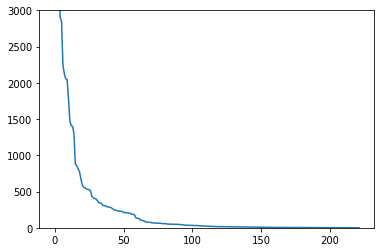

In [37]:
plt.plot(gdps)
plt.ylim(0,3000)

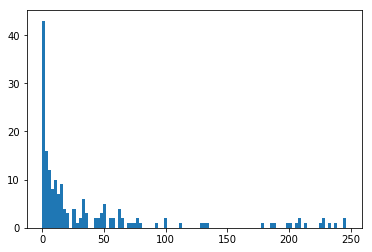

In [41]:
gdps = gdps[gdps<250]
plt.hist(gdps,100);

In [80]:
df2 = pd.read_csv('./datasets/migrants.csv')
df2

,Unnamed: 0,ccode,country,number1000,percentarea,under18
0,0,AFG,Afghanistan,134,0.0,40
1,1,ALB,Albania,52,2.0,47
2,2,DZA,Algeria,249,1.0,20
3,3,AND,Andorra,41,53.0,7
4,4,AGO,Angola,638,2.0,47
5,5,AIA,Anguilla,6,37.0,22
6,6,ATG,Antigua and Barbuda,29,28.0,11
7,7,ARG,Argentina,2165,5.0,8
8,8,ARM,Armenia,191,7.0,8
9,9,AUS,Australia,7036,29.0,7


In [81]:
print(df2.columns)
df2.drop(columns=['Unnamed: 0','percentarea'])
df2.sort_values('number1000',ascending=0).head()

Index(['Unnamed: 0', 'ccode', 'country', 'number1000', 'percentarea',
       'under18'],
      dtype='object')


,Unnamed: 0,ccode,country,number1000,percentarea,under18
188,188,USA,United States of America,49777,15.0,5
152,152,SAU,Saudi Arabia,12185,37.0,20
66,66,DEU,Germany,12165,15.0,5
144,144,RUS,Russian Federation,11652,8.0,6
186,186,GBR,United Kingdom of Great Britain and Northern I...,8842,13.0,8


In [35]:
#merge 

In [82]:
df = pd.read_csv('./datasets/maternal_health.csv')
df.head()

,Unnamed: 0,ccode,country,year,Total,age 15-17,age 18-19,<20,>20,age 20-34,age 35-49
0,0,AFG,Afghanistan,2010.0,47.872012,48.292231,45.121149,45.634003,46.635823,46.702356,46.323971
1,1,ALB,Albania,2000.0,95.269887,100.000000,100.000000,100.000000,94.967483,95.399258,91.427947
2,2,ALB,Albania,2005.0,97.124568,100.000000,100.000000,100.000000,96.828206,97.107991,94.331780
3,3,ALB,Albania,2008.0,98.420840,92.577894,100.000000,97.778378,98.465574,98.467706,98.438906
4,4,ARG,Argentina,2012.0,98.070102,99.298196,98.597808,98.905995,97.936854,97.992949,97.707396


In [84]:
df = pd.read_csv('./datasets/gapminderDataFiveYear.csv')
df.head()
#group

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


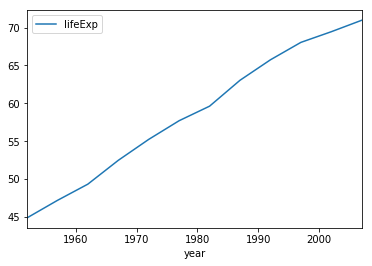

In [86]:
df[df['country']=='Iran'].plot('year','lifeExp')

In [87]:
df = pd.read_csv('./datasets/disease.csv')
df.head()
#discribe, pie

,Unnamed: 0,ccode,country,year,AIDS,Congenital,Diarrhoea,Injury,Intrapartum,Malaria,Measles,Meningitis,Pneumonia,Preterm,Sepsis,Tetanus,Other,Total
0,0,AFG,Afghanistan,2017,0.0,6.4,7.8,5.8,15.9,0.1,1.8,3.4,14.9,19.2,8.4,1.6,14.7,100
1,1,ALB,Albania,2017,0.7,27.2,0.6,7.0,8.8,0.0,0.0,2.2,8.9,28.9,2.6,0.8,12.3,100
2,2,DZA,Algeria,2017,0.1,16.0,4.8,6.3,14.4,0.0,0.3,1.0,13.0,21.1,9.2,0.2,13.7,100
3,3,AND,Andorra,2017,0.0,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.7,0.0,0.0,16.7,100
4,4,AGO,Angola,2017,2.8,7.0,9.3,6.4,13.6,7.0,0.7,2.0,17.3,12.0,5.7,0.5,15.9,100


In [88]:
df = pd.read_csv('./datasets/su5m.csv')
df.mean()


Unnamed: 0    97.000000
m1990         76.001026
m2000         60.231282
m2010         41.063590
m2015         33.532308
m2017         31.383077
f1990         67.412821
f2000         53.001026
f2010         35.527692
f2015         28.628205
f2017         26.704615
dtype: float64